# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = study_results.merge(mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
selected_merged_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", \
                     "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

selected_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
mouse_count = selected_merged_df["Mouse ID"].nunique()
mouse_count

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = selected_merged_df[selected_merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
selected_value = duplicates.loc[:,'Mouse ID']
selected_value.unique()

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_Mouse = selected_merged_df.loc[selected_merged_df["Mouse ID"]=="g989",:]
duplicates_Mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = selected_merged_df.loc[selected_merged_df['Mouse ID'] != 'g989']
clean_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_merged_df["Mouse ID"].nunique()
mouse_count2

248

In [12]:
## Options

In [13]:
grouped_means = clean_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
grouped_median = clean_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
grouped_var = clean_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
grouped_std = clean_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
grouped_sem = clean_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

In [15]:
grouped2_df = pd.DataFrame({'Mean Tumor Volume': grouped_means, 
                   'Median Tumor Volume': grouped_median,
                   'Tumor Volume Variance': grouped_var,
                   'Tumor Volume Std. Dev.': grouped_std,
                   'Tumor Volume Std. Err.': grouped_sem
                  })
grouped2_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
## Option Ended

In [17]:
clean_merged_df_copy = clean_merged_df.copy()
clean_merged_df_copy["Tumor_Volume_Copy1"] = clean_merged_df_copy["Tumor Volume (mm3)"].copy()
clean_merged_df_copy["Tumor_Volume_Copy2"] = clean_merged_df_copy["Tumor Volume (mm3)"].copy()
clean_merged_df_copy["Tumor_Volume_Copy3"] = clean_merged_df_copy["Tumor Volume (mm3)"].copy()
clean_merged_df_copy["Tumor_Volume_Copy4"] = clean_merged_df_copy["Tumor Volume (mm3)"].copy()
clean_merged_df_copy["Tumor_Volume_Copy5"] = clean_merged_df_copy["Tumor Volume (mm3)"].copy()
clean_merged_df_copy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor_Volume_Copy1,Tumor_Volume_Copy2,Tumor_Volume_Copy3,Tumor_Volume_Copy4,Tumor_Volume_Copy5
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.000000,45.000000,45.000000,45.000000,45.000000
1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000,45.000000,45.000000,45.000000,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,45.000000,45.000000,45.000000,45.000000,45.000000
3,a457,0,45.000000,0,Ketapril,Female,11,30,45.000000,45.000000,45.000000,45.000000,45.000000
4,c819,0,45.000000,0,Ketapril,Male,21,25,45.000000,45.000000,45.000000,45.000000,45.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521,41.581521,41.581521,41.581521,41.581521
1889,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923,31.023923,31.023923,31.023923,31.023923
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892,61.433892,61.433892,61.433892,61.433892
1891,x773,45,58.634971,4,Placebo,Female,21,30,58.634971,58.634971,58.634971,58.634971,58.634971


In [19]:
grouped_df = clean_merged_df_copy.groupby('Drug Regimen').agg({
     'Tumor_Volume_Copy1': 'mean',                                               # get the first mention since the data is repeated
     'Tumor_Volume_Copy2': 'median',                                               # get the first mention since the data is repeated
     'Tumor_Volume_Copy3': 'var',                                               # get the first mention since the data is repeated
     'Tumor_Volume_Copy4': 'std',                                                # get the mean for "maths_score2"
     'Tumor_Volume_Copy5': 'sem'       # get the mean in percentage for "maths_score"
 }).reset_index()  

# Rename columns per required output
grouped_df.rename(columns={
    'Tumor_Volume_Copy1': 'Mean Tumor Volume',
    'Tumor_Volume_Copy2': 'Median Tumor Volume',
    'Tumor_Volume_Copy3': 'Tumor Volume Variance',
    'Tumor_Volume_Copy4': 'Tumor Volume Std. Dev.',
    'Tumor_Volume_Copy5': 'Tumor Volume Std. Err.'
}, inplace=True)  

grouped_df.set_index('Drug Regimen', inplace=True)              # use 'School_Name' as index

grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [21]:
result = clean_merged_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)

# Reset the index to match the desired output format
result = result.reset_index()
result.set_index('Drug Regimen', inplace=True) 

result.columns = pd.MultiIndex.from_tuples([
    ("Tumor Volume (mm3)", "mean"),
    ("Tumor Volume (mm3)", "median"),
    ("Tumor Volume (mm3)", "var"),
    ("Tumor Volume (mm3)", "std"),
    ("Tumor Volume (mm3)", "sem")
])

#result.set_index('Drug Regimen', inplace=True) 
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

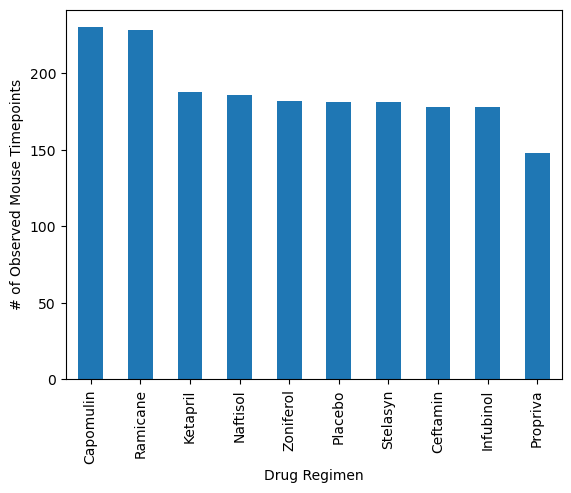

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and calculate the size of each group
grouped = clean_merged_df.groupby('Drug Regimen').size().reset_index(name='Count')

# Sort the DataFrame based on 'ColumnA'
sorted_grouped = grouped.sort_values(by='Count', ascending=False)

# Create the DataFrame
# Plot using pandas
ax = sorted_grouped.plot(kind='bar', x='Drug Regimen', y='Count', legend=False)
ax.set_ylabel('# of Observed Mouse Timepoints')

plt.show()

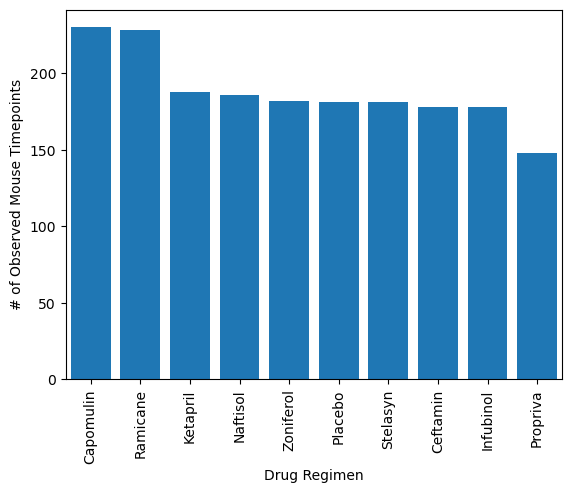

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Plot a bar chart using Matplotlib
ax = sorted_grouped.plot(kind='bar', x='Drug Regimen', y='Count', legend=False)
ax.set_ylabel('# of Observed Mouse Timepoints')


plt.bar(sorted_grouped['Drug Regimen'], sorted_grouped['Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()

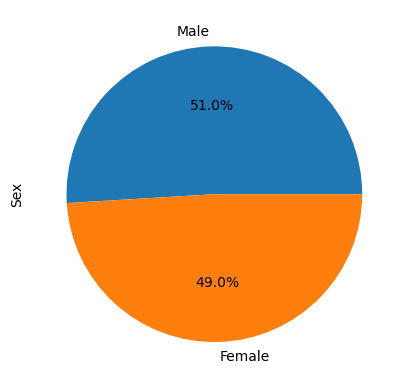

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each gender
gender_counts = clean_merged_df['Sex'].value_counts()

# Plot a pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)

plt.show()

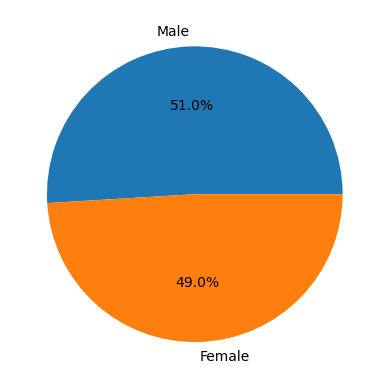

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)

plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the DataFrame for specified Drug Regimens
selected_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_merged_df.loc[clean_merged_df['Drug Regimen'].isin(selected_drug_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_volume = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last().reset_index()
last_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_tumor_volume, clean_merged_df, on=['Mouse ID','Tumor Volume (mm3)'], how="inner")
merged_df

,Mouse ID,Tumor Volume (mm3),Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,67.973419,45,2,Infubinol,Female,20,23
1,a251,65.525743,45,1,Infubinol,Female,21,25
2,a275,62.999356,45,3,Ceftamin,Female,20,28
3,a411,38.407618,45,1,Ramicane,Male,3,22
4,a444,43.047543,45,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,68.594745,45,4,Ceftamin,Female,6,27
96,y793,31.896238,45,2,Capomulin,Male,17,17
97,y865,64.729837,45,3,Ceftamin,Male,23,26
98,z578,30.638696,45,0,Ramicane,Male,11,16


In [52]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store tumor volume data for each treatment
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate IQR
    Q1 = treatment_tumor_volume.quantile(0.25)
    Q3 = treatment_tumor_volume.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter potential outliers
    outliers = treatment_tumor_volume[(treatment_tumor_volume < lower_bound) | (treatment_tumor_volume > upper_bound)]
    
    # Store tumor volume data and outliers for the treatment
    tumor_volume_data[treatment] = {
        'tumor_volume': treatment_tumor_volume,
        'outliers': outliers
    }

# Print the results
for treatment, data in tumor_volume_data.items():
    print(f"Outliers in {treatment}:", data['outliers'])

Outliers in Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers in Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers in Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers in Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [63]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store tumor volume data for each treatment
Capomulin_tumor_volume = []
Ramicane_tumor_volume = []
Infubinol_tumor_volume = []
Ceftamin_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    if treatment == "Capomulin":
        # Locate the rows which contain mice on each drug and get the tumor volumes
        Capomulin_tumor_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    elif treatment == "Ramicane":
        # Locate the rows which contain mice on each drug and get the tumor volumes
        Ramicane_tumor_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    elif treatment == "Infubinol":
        # Locate the rows which contain mice on each drug and get the tumor volumes
        Infubinol_tumor_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    elif treatment == "Ceftamin":
        # Locate the rows which contain mice on each drug and get the tumor volumes
        Ceftamin_tumor_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    
    # Calculate IQR
def identify_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

# Identify and print outliers for each dataset
outliers1 = identify_outliers(df['Capomulin'])
outliers2 = identify_outliers(df['Ramicane'])
outliers3 = identify_outliers(df['Infubinol'])
outliers4 = identify_outliers(df['Ceftamin'])

print("Capomulin's potential outliers:", outliers1)
print("Ramicane's potential outliers:", outliers2)
print("Infubinol's potential outliers:", outliers3)
print("Ceftamin's potential outliers:", outliers4)


Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


In [28]:
merged_df.to_csv('outputZZZ.csv', index=False)

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
# Extract Tumor Volume for Drug Regimen "Infubinol" only
Capomulin_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Ramicane_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

data = {
    'Capomulin': Capomulin_tumor_volume,
    'Ramicane': Ramicane_tumor_volume,
    'Infubinol': Infubinol_tumor_volume,
    'Ceftamin': Ceftamin_tumor_volume
}
df = pd.DataFrame(data)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# If the data is in a dataframe, we use pandas to give quartile calculations
# Define a function to identify outliers based on IQR
def identify_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

# Identify and print outliers for each dataset
outliers1 = identify_outliers(df['Capomulin'])
outliers2 = identify_outliers(df['Ramicane'])
outliers3 = identify_outliers(df['Infubinol'])
outliers4 = identify_outliers(df['Ceftamin'])

print("Capomulin's potential outliers:", outliers1)
print("Ramicane's potential outliers:", outliers2)
print("Infubinol's potential outliers:", outliers3)
print("Ceftamin's potential outliers:", outliers4)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
# Extract Tumor Volume for Drug Regimen "Infubinol" only
Capomulin_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Ramicane_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

data = {
    'Capomulin': Capomulin_tumor_volume,
    'Ramicane': Ramicane_tumor_volume,
    'Infubinol': Infubinol_tumor_volume,
    'Ceftamin': Ceftamin_tumor_volume
}
df = pd.DataFrame(data)

#Create a boxplot using pandas
#df.boxplot(meanprops=dict(color='red'))
# Create a boxplot with red outlier dots and black line
#df.boxplot(medianprops=dict(color='red'),flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=8), grid=False)

# Create a boxplot with black outer lines
df.boxplot(boxprops=dict(color='black', linewidth=1), whiskerprops=dict(color='black', linewidth=1),\
          medianprops=dict(color='red'),flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=8), grid=False)

# Set plot title and labels
plt.ylabel("Final Tumor Volume (mm3)")


# Show the plot
plt.show()

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Use df.loc to select Drug Regimen = 'Capomulin' and Mouse ID = 'I509'
selected_Capomulin = clean_merged_df.loc[(clean_merged_df['Drug Regimen'] == 'Capomulin') & (clean_merged_df['Mouse ID'] == 'l509')]
selected_timepoints_Cap = selected_Capomulin["Tumor Volume (mm3)"]
selected_timepoints_Cap

x_axis = selected_Capomulin["Timepoint"]
# Create a graph based upon the list and array we have created
plt.plot(x_axis, selected_timepoints_Cap.values)
# Show the graph that we have created
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
selected_Capomulin = clean_merged_df.loc[clean_merged_df['Drug Regimen'] == 'Capomulin']

x_axis = selected_Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
average_tumor_volume_per_mouse = selected_Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#The size of each point on our plot is determined by their x value
plt.scatter(x_axis, average_tumor_volume_per_mouse, marker="o", facecolors="blue", edgecolors="blue",
            s=x_axis, alpha=0.75)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(x_axis,average_tumor_volume_per_mouse)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = selected_Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
y_values = selected_Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()